In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
filename = "weight-height.csv"

In [126]:
data = pd.read_csv(filename)
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Labeling Gender

In [6]:
label_enc = LabelEncoder()
data.Gender = label_enc.fit_transform(data.Gender)

In [8]:
data.sample(5)

,Gender,Height,Weight
1110,1,71.751423,215.935394
911,1,66.854738,161.223965
4689,1,70.595778,197.314564
8039,0,62.719589,121.811621
9827,0,61.083827,118.743805


In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Model

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42,train_size=0.7)

In [106]:
lin_reg = LinearRegression()

In [107]:
model = lin_reg.fit(X_train, y_train)

In [108]:
accuracy = model.score(X_test, y_test)

In [109]:
y_pred = lin_reg.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
print("Coefficients: \n", lin_reg.coef_)

Coefficients: 
 [19.40445243  5.96180802]


In [112]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 100.82
Coefficient of determination: 0.90


In [113]:
print(f"Akurasi Model: {accuracy * 100}%")

Akurasi Model: 90.33211309502138%


## Plot

In [93]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [127]:
data['Weight-pred'] = lin_reg.predict(X)

In [129]:
import seaborn as sns

sns.set_style('whitegrid')

C:\Users\intel\anaconda3\envs\flask\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


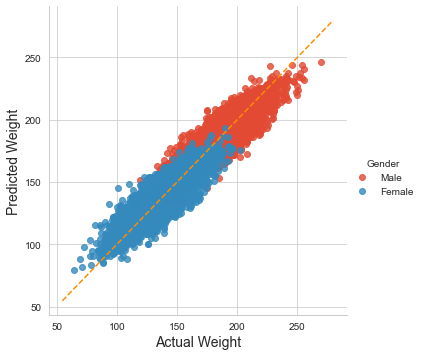

In [134]:
sns.lmplot(x='Weight', y='Weight-pred', data=data, fit_reg=False, size=5,hue="Gender")

line_coords = np.arange(data[['Weight', 'Weight-pred']].min().min()-10, 
                        data[['Weight', 'Weight-pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Weight', fontsize=14)
plt.xlabel('Actual Weight', fontsize=14)
plt.show()

## Save Model

In [136]:
joblib.dump((model), "Weight-prediction-using-Linear-regression.pkl")

['Weight-prediction-using-Linear-regression.pkl']